In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
%matplotlib inline
from ddpg_agent import Agent 

In [2]:
# = = = = = = = = = Enviroment initialization = = = = = = = = = # 
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1] 

print('Number of agents:    ', num_agents)  
print('Size of each action: ', action_size) 
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size)) 
print('The state for the first agent looks like:  ', states) 

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents:     1
Size of each action:  4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like:   [[ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
   1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
   5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -1.68164849e-01]]


In [17]:
agent = Agent(state_size=len(states[0]), action_size=action_size, random_seed=10) 

In [15]:
print(dir(env_info))
agent_num = 0 
print("Rewards:   ",env_info.rewards[agent_num]) 
print("Observations:   ",env_info.vector_observations[agent_num] ) 
print("Done status:    ",env_info.local_done[agent_num] ) 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'agents', 'local_done', 'max_reached', 'memories', 'previous_text_actions', 'previous_vector_actions', 'rewards', 'text_observations', 'vector_observations', 'visual_observations']
Rewards:    0.0
Observations:    [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1

/home/nathan/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode: 10	 Average score: 0.041999999061226846	 Score: 0.08999999798834324
Episode: 20	 Average score: 0.020999999530613423	 Score: 0.0
Episode: 30	 Average score: 0.01966666622708241	 Score: 0.0
Episode: 40	 Average score: 0.020499999541789292	 Score: 0.0
Episode: 50	 Average score: 0.018999999575316905	 Score: 0.0
Episode: 60	 Average score: 0.019333332901199658	 Score: 0.0
Episode: 70	 Average score: 0.01657142820102828	 Score: 0.0
Episode: 80	 Average score: 0.01649999963119626	 Score: 0.0
Episode: 90	 Average score: 0.018111110706296233	 Score: 0.0
Episode: 100	 Average score: 0.01669999962672591	 Score: 0.0
Episode: 100	 Average score: 0.01669999962672591


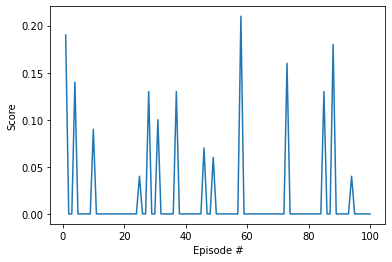

In [20]:
def ddpg(num_episodes=1000, max_timesteps=500):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf 
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0]
    
    for ith_episode in range(1, num_episodes+1): 
        agent.reset() 
        score = 0 

        for timestep in range(max_timesteps): 
            action = agent.act(state) 

            env_info = env.step(action) 
            next_state = env_info[brain_name].vector_observations[agent_num]
            reward = env_info[brain_name].rewards[agent_num]
            done = env_info[brain_name].local_done[agent_num] 

            agent.step(state, action, reward, next_state, done) 

            state = next_state 
            score += reward
            if done:
                break

        scores_deque.append(score) 
        scores.append(score) 

        if ith_episode % 10 == 0:        
            print("Episode: {}\t Average score: {}\t Score: {}".format(ith_episode, np.mean(scores_deque), score)) 

        if ith_episode % 100 == 0:
            #torch.save(agent.actor_local.state_dict(),  "checkpoint_actor.pth")   
            #torch.save(agent.critic_local.state_dict(), "checkpoint_critic.pth") 
            print("Episode: {}\t Average score: {}".format(ith_episode, np.mean(scores_deque))) 

    return scores 

scores = ddpg(num_episodes=100) 

fig = plt.figure() 
ax = fig.add_subplot(111) 
plt.plot(np.arange(1, len(scores)+1), scores) 
plt.ylabel('Score') 
plt.xlabel('Episode #') 
plt.show() 